In [44]:
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd

from myConvexHull.process import Convex
from scipy.spatial import ConvexHull

In [45]:
title = "Mean Smoothness vs Mean Compactness"

data = datasets.load_breast_cancer()
df = pd.DataFrame(data.data, columns = data.feature_names)
df['Target'] = pd.DataFrame(data.target)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


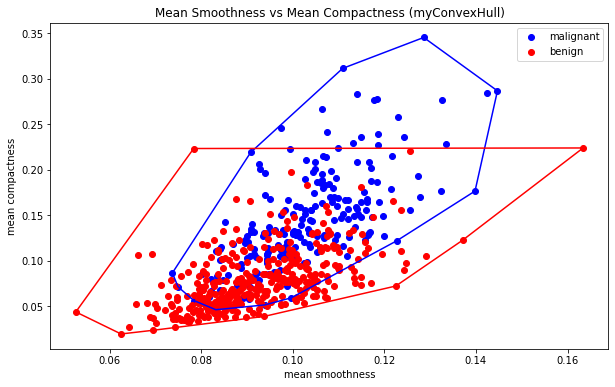

In [46]:
# Penggunaan library myConvexHull
plt.figure(figsize = (10, 6))
plt.title(title + ' (myConvexHull)')
plt.xlabel(data.feature_names[4])
plt.ylabel(data.feature_names[5])

ConvexObj = Convex()
colors = ['b', 'r', 'g']

for i in range(len(data.target_names)):
    bucket = df[df['Target'] == i].iloc[:, [4, 5]].values
    hull = ConvexObj.ConvexHull(bucket)
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i], color = colors[i % len(colors)])
    plt.plot(hull[0], hull[1], color = colors[i % len(colors)])
plt.legend()

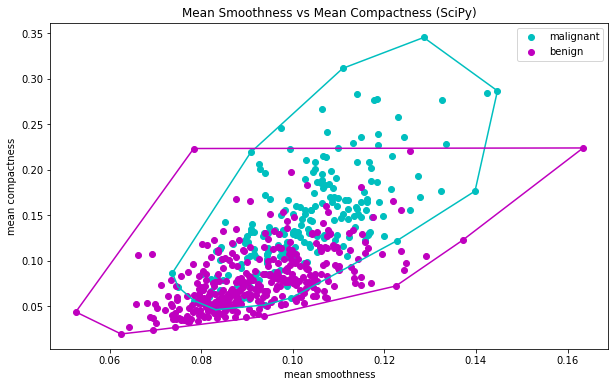

In [47]:
# Perbandingan menggunakan library SciPy
plt.figure(figsize = (10, 6))
plt.title(title + ' (SciPy)')
plt.xlabel(data.feature_names[4])
plt.ylabel(data.feature_names[5])

scolors = ['c', 'm', 'y']

for i in range(len(data.target_names)):
    bucket = df[df['Target'] == i].iloc[:, [4,5]].values
    hull = ConvexHull(bucket)
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i], color = scolors[i % len(scolors)])
    for simplex in hull.simplices:
        plt.plot(bucket[simplex, 0], bucket[simplex, 1], color = scolors[i % len(scolors)])
plt.legend()
